In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pybaseball import batting_stats,pitching_stats,playerid_lookup

teams = pd.read_csv('mlb_teams.csv')

In [2]:
playerid_lookup('ohtani')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,ohtani,shohei,660271,ohtas001,ohtansh01,19755,2018.0,2023.0


In [27]:
%%time
# get batting data for years 2015-2022
data = batting_stats(2014,2022, qual=1)
data.to_csv('stats/fg_batting2014-2022.csv', index=False)

# get fangraphs pitching stats for same year range
data = pitching_stats(2014,2022, qual=1)
data.to_csv('stats/fg_pitching2014-2022.csv', index=False)

CPU times: user 31.8 s, sys: 609 ms, total: 32.4 s
Wall time: 5min 50s


In [2]:
# load fangraphs batting and pitching stats
db = pd.read_csv('stats/fg_batting2014-2022.csv')
print(len(db))

dp = pd.read_csv('stats/fg_pitching2014-2022.csv')
print(len(dp))

8140
6954


In [3]:
'1B_y' in db.columns

False

In [30]:
values, counts = np.unique(np.array(db['IDfg']), return_counts=True)
values[np.argsort(counts)[::-1]], counts[np.argsort(counts)[::-1]]

(array([ 6153,  5222,  9627, ..., 14366, 14391,    25]),
 array([9, 9, 9, ..., 1, 1, 1]))

In [31]:
values[counts==9]

array([ 1177,  1744,  2136,  2396,  2434,  2900,  2967,  3142,  3473,
        3516,  4106,  4314,  4892,  4922,  4940,  4949,  5038,  5222,
        5235,  5254,  5273,  5297,  5343,  5361,  5417,  5486,  5491,
        5497,  5760,  5827,  5913,  5933,  6012,  6153,  6184,  6887,
        7007,  7739,  7802,  7859,  8090,  8202,  8259,  8418,  8709,
        8722,  9077,  9218,  9241,  9256,  9368,  9627,  9777,  9847,
        9874, 10030, 10047, 10059, 10071, 10155, 10199, 10200, 10243,
       10264, 10324, 10472, 10556, 10762, 10847, 10950, 10953, 11038,
       11200, 11265, 11339, 11342, 11368, 11477, 11489, 11493, 11579,
       11737, 11739, 11899, 12147, 12161, 12179, 12282, 12325, 12371,
       12434, 12510, 12532, 12533, 12546, 12552, 12775, 12856, 12859,
       12861, 12979, 12984, 13152, 13265, 13329, 13510, 13611, 13757,
       14221, 15676])

For every player, we need Team, Age, and Posistion

For evaluating batters, we're using SLG, OBP, and wOBA (Maybe also HR, R, RBI?) [offense cols](https://library.fangraphs.com/offense/offensive-statistics-list/)

For evaluating pitchers use ERA, FIP, WHIP, Pitches [pitching cols](https://library.fangraphs.com/pitching/complete-list-pitching/)

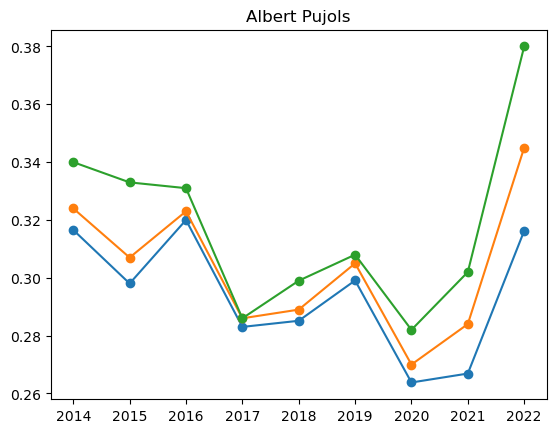

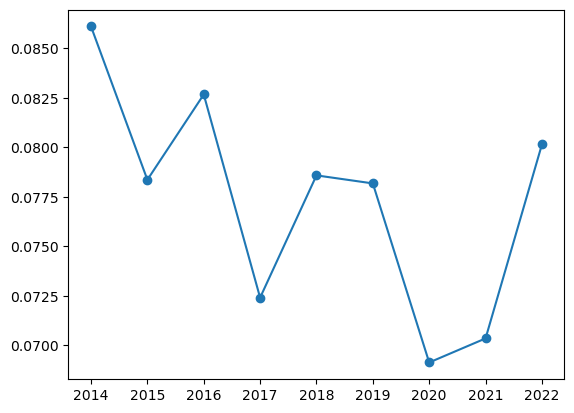

In [32]:
# look at a single player
player = db[db['IDfg']==1177].sort_values('Season')

plt.plot(player['Season'], (player['H']+player['BB'])/player['PA'], 'o-')
plt.plot(player['Season'], player['OBP'], 'o-')
plt.plot(player['Season'], player['wOBA'], 'o-')
plt.title(player['Name'].iloc[0])

plt.figure()
#plt.plot(player['Season'], player['Pitches'], 'o-')
#plt.plot(player['Season'], player['Pitches'], 'o-')
plt.plot(player['Season'], (player['H']+player['BB'])/player['Pitches'], 'o-')

In [33]:
values_p, counts_p = np.unique(np.array(dp['IDfg']), return_counts=True)
values_p[np.argsort(counts_p)[::-1]], counts_p[np.argsort(counts_p)[::-1]]

(array([11632,  4264,  9111, ..., 20399, 10181, 30115]),
 array([9, 9, 9, ..., 1, 1, 1]))

In [34]:
values_p[counts_p==9]

array([ 1157,  1247,  1514,  1581,  1943,  2036,  2233,  2429,  2608,
        3096,  3137,  3237,  3321,  3548,  4264,  4301,  4676,  4806,
        5003,  5114,  5420,  5448,  5524,  5640,  6397,  6483,  6632,
        6655,  6661,  6893,  6895,  6902,  6984,  6986,  7005,  7146,
        7550,  7593,  7608,  7836,  8110,  8779,  9111,  9434,  9761,
        9784,  9817, 10123, 10131, 10133, 10233, 10314, 10343, 10756,
       10855, 10954, 11423, 11486, 11632, 11804, 11836, 12049, 12572,
       12768, 12863, 12890, 12988, 13125, 13475, 13763, 13781, 14078,
       14107, 14814, 15423])

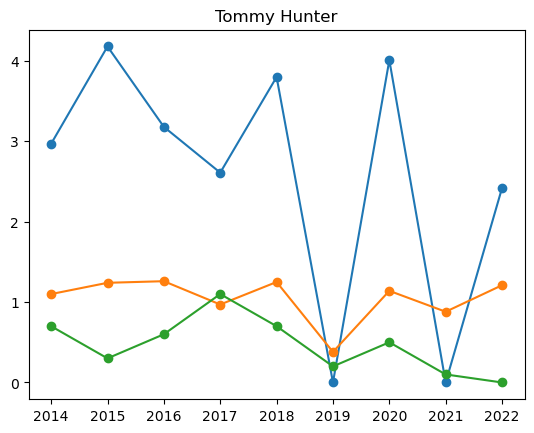

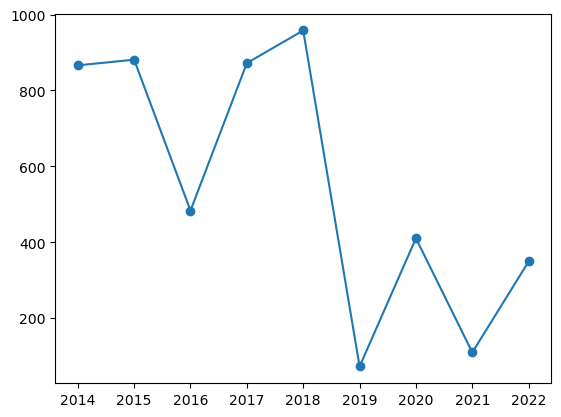

In [35]:
# look at a single player
player = dp[dp['IDfg']==1157].sort_values('Season')

plt.plot(player['Season'], player['ERA'], 'o-')
plt.plot(player['Season'], player['WHIP'], 'o-')
plt.plot(player['Season'], player['WAR'], 'o-')
plt.title(player['Name'].iloc[0])

plt.figure()
plt.plot(player['Season'], player['Pitches'], 'o-')

In [36]:
player[['Season','W','L', 'G', 'IP', 'Pitches']] # Wins, Losses, Games, innings pitched

,Season,W,L,G,IP,Pitches
1796,2014,3,2,60,60.2,866
2658,2015,4,2,58,60.1,881
2017,2016,2,2,33,34.0,483
1296,2017,3,5,61,58.2,872
1753,2018,5,4,65,64.0,958
3163,2019,0,0,5,5.1,72
2317,2020,0,1,24,24.2,410
3600,2021,0,0,4,8.0,109
4361,2022,0,1,18,22.1,349


In [37]:
list(player.columns)

['IDfg',
 'Season',
 'Name',
 'Team',
 'Age',
 'W',
 'L',
 'WAR',
 'ERA',
 'G',
 'GS',
 'CG',
 'ShO',
 'SV',
 'BS',
 'IP',
 'TBF',
 'H',
 'R',
 'ER',
 'HR',
 'BB',
 'IBB',
 'HBP',
 'WP',
 'BK',
 'SO',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'K/9',
 'BB/9',
 'K/BB',
 'H/9',
 'HR/9',
 'AVG',
 'WHIP',
 'BABIP',
 'LOB%',
 'FIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'Starting',
 'Start-IP',
 'Relieving',
 'Relief-IP',
 'RAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'WPA/LI',
 'Clutch',
 'FB% 2',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C',
 'wKN/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%'